In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import random
from pandas import DataFrame
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score


# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario5_individual_model_approach"

In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

AEW541_//n
train_X shape: (392, 18988)
392 train samples
98 test samples
StartTime : 2020-09-18 10:04:06.470401
EndTime : 2020-09-18 10:04:10.500622
AEW541’s final rmse value is = 0.907596
AEW541 R-squared value is = -0.331209
Nilotinib_//n
train_X shape: (326, 18988)
326 train samples
81 test samples
StartTime : 2020-09-18 10:04:11.491973
EndTime : 2020-09-18 10:04:13.077732
Nilotinib’s final rmse value is = 1.057297
Nilotinib R-squared value is = -0.047358
17-AAG_//n
train_X shape: (392, 18988)
392 train samples
98 test samples
StartTime : 2020-09-18 10:04:13.680122
EndTime : 2020-09-18 10:04:17.662471
17-AAG’s final rmse value is = 1.144430
17-AAG R-squared value is = -0.008048
PHA-665752_//n
train_X shape: (392, 18988)
392 train samples
98 test samples
StartTime : 2020-09-18 10:04:18.738594
EndTime : 2020-09-18 10:04:20.002216
PHA-665752’s final rmse value is = 0.159045
PHA-665752 R-squared value is = -0.271907
Lapatinib_//n
train_X shape: (393, 18988)
393 train samples
98 test sam

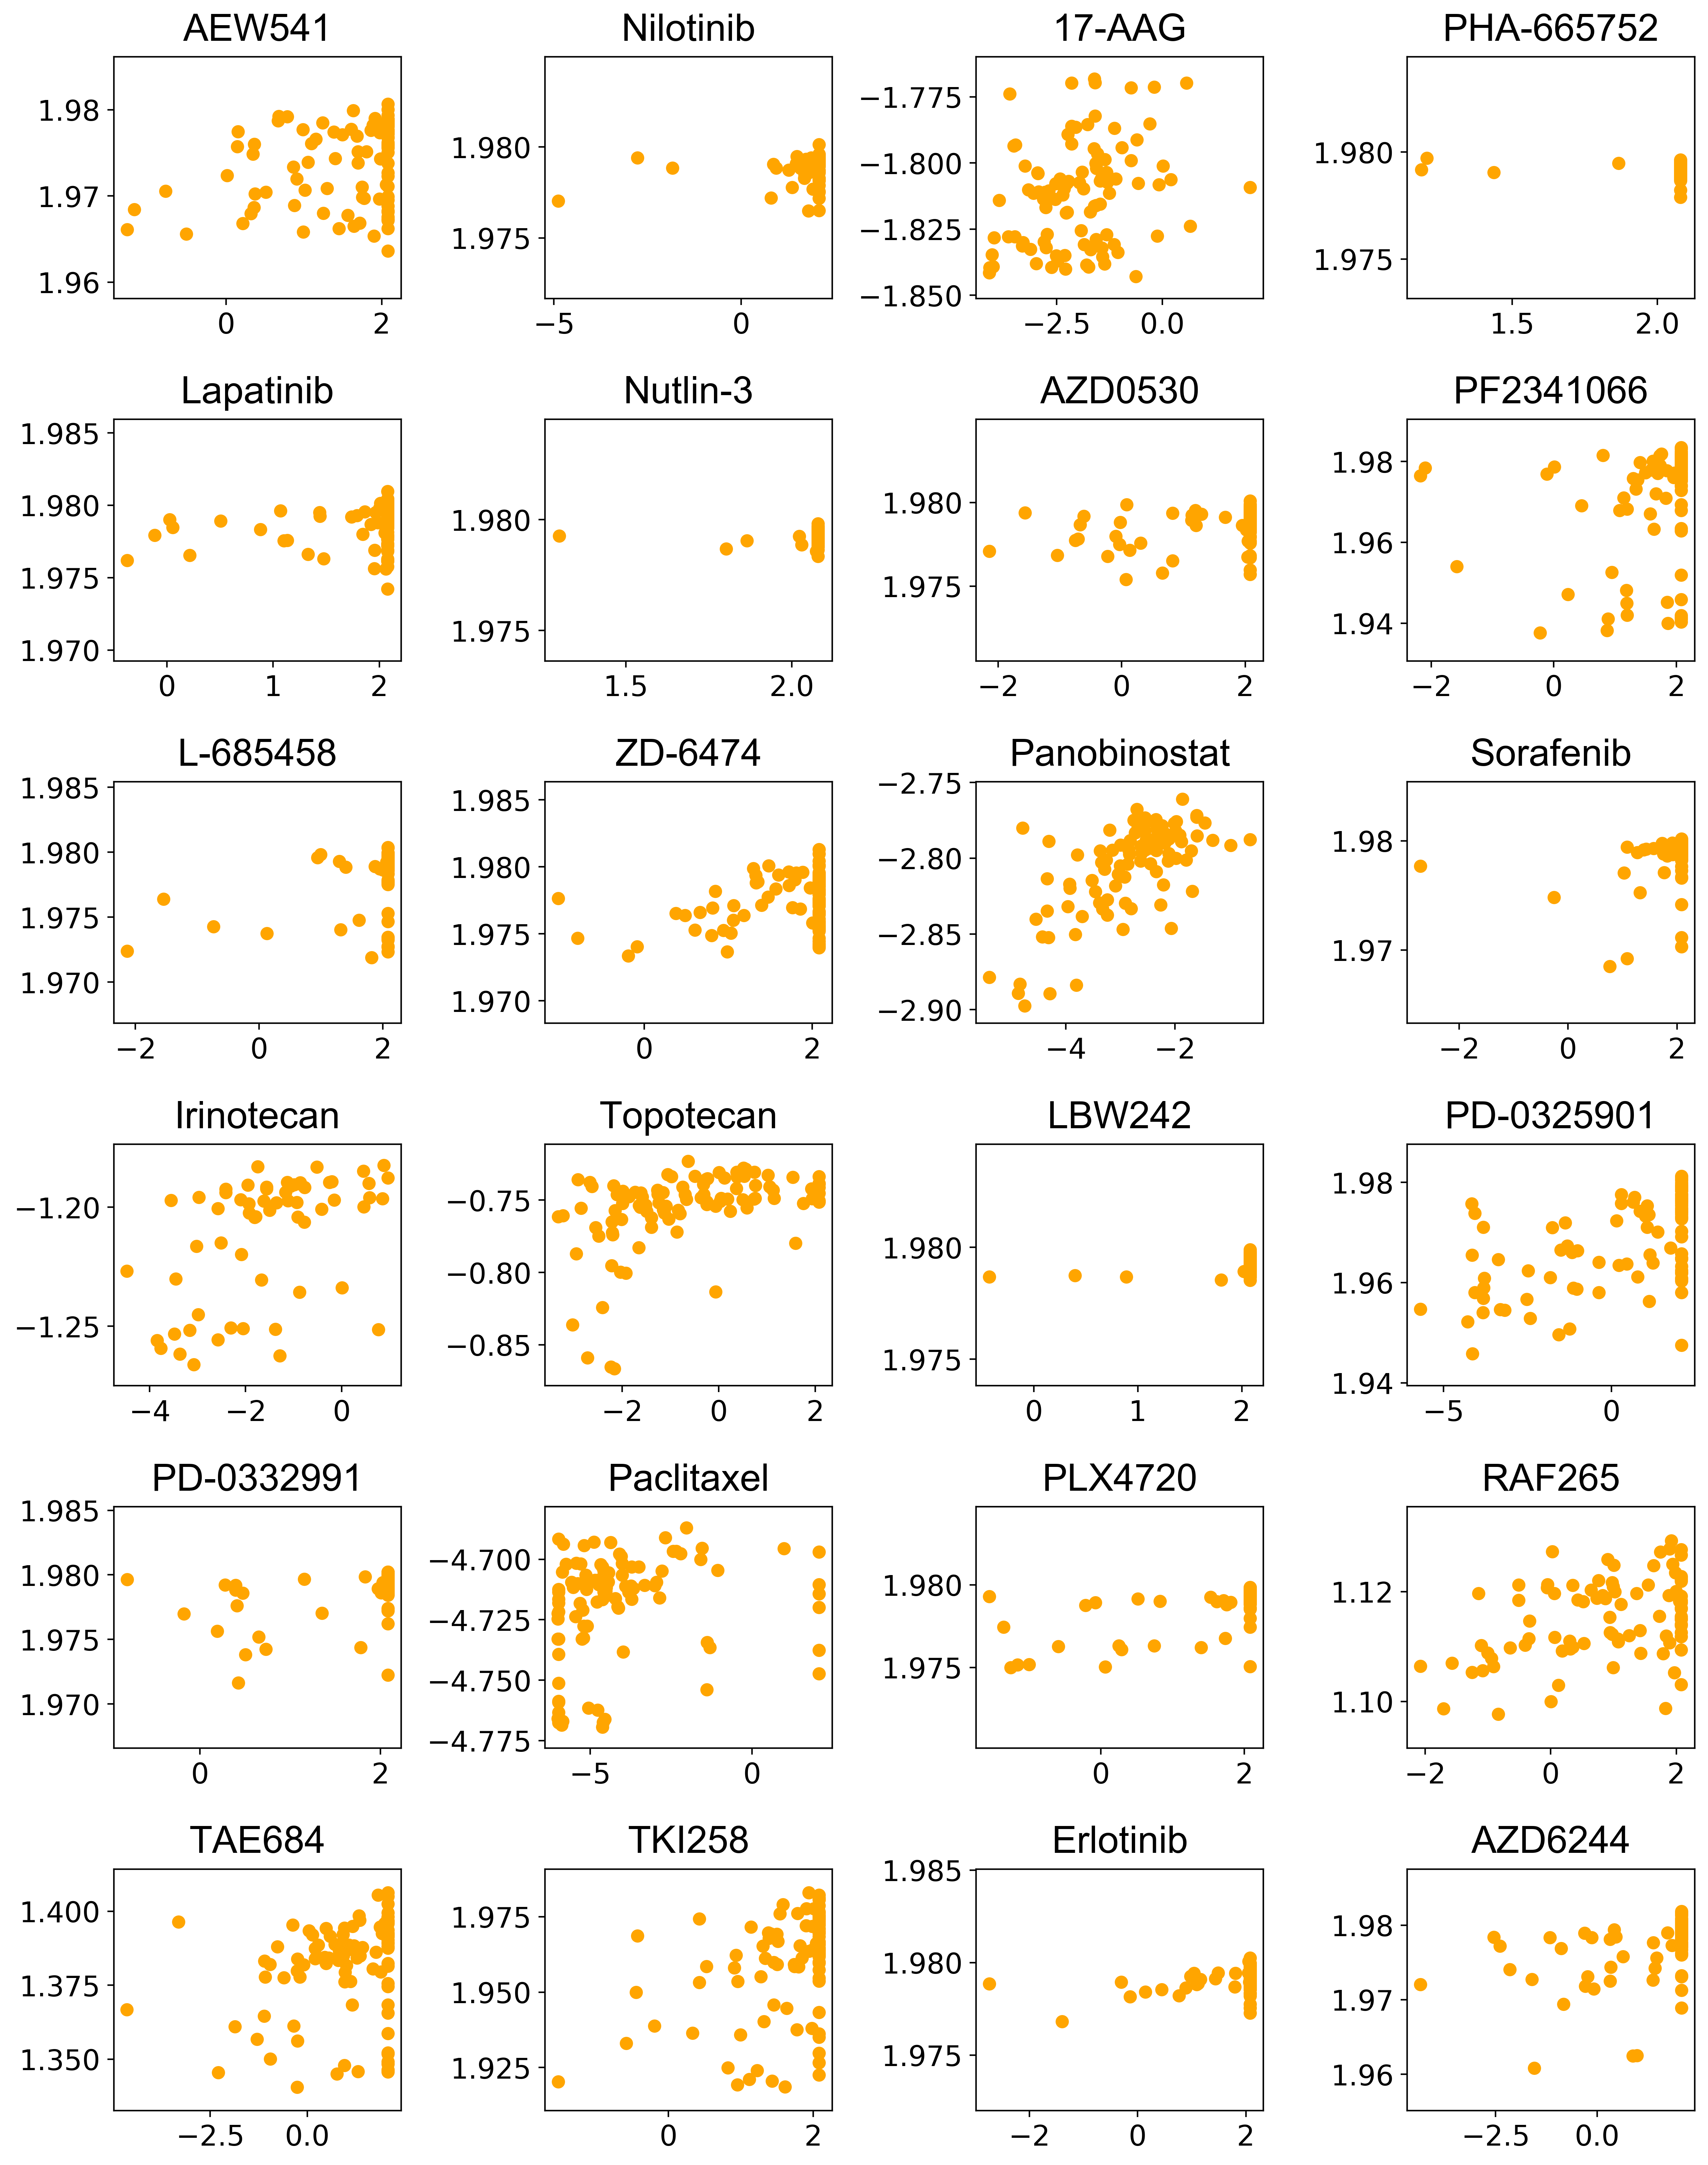

In [3]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(workdir + "//200914_EC11K_%s.npz" % dname)
    ss0 = np.load(workdir + '//200914_EC11K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    svr_lin = SVR(C=0.01)
    svr_lin.fit(train_X, train_y).predict(test_X)
    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = svr_lin.predict(test_X)
    predicted_value = predicted_classes
        
    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//Scenario5_individual_approach//Table//SVR"
    c.to_csv(workdir + '//200915_scenario5_SVR_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
    workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario5_individual_model_approach"
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//Scenario5_individual_approach//Figure"    

plt.savefig(workdir +'//200915_scenario5_SVR_plot.png', dpi=400)

In [4]:
num

25

In [5]:
print("This is lasso regression with expression dataset for each drugs")
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

This is lasso regression with expression dataset for each drugs


In [6]:
result

,Drug,RMSE,R2value
0,AEW541,0.907596,-0.331209
1,Nilotinib,1.057297,-0.047358
2,17-AAG,1.144430,-0.008048
3,PHA-665752,0.159045,-0.271907
4,Lapatinib,0.537308,-0.044174
5,Nutlin-3,0.121376,-1.009770
6,AZD0530,1.040181,-0.157232
7,PF2341066,0.882993,-0.135286
8,L-685458,0.683171,-0.015475
9,ZD-6474,0.699659,-0.156796


In [7]:
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//Scenario5_individual_approach" 
result.to_csv(workdir +'//200915_scenario5_SVR_24drugs_metrics.csv', index=False)